# Development environment setup

## Libraries

In [28]:
from pathlib import Path
from pprint import pprint

import duckdb as db
import numpy as np
import pandas as pd
import pendulum as pdm
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import yaml
from plotly.offline import plot
from plotly.subplots import make_subplots
from transformers import pipeline


## Path

In [29]:
project_folder = Path(".").absolute().parent

## Parameters file

In [30]:
with open(project_folder.joinpath("parameters.yaml"), "r") as f:
    parameters = yaml.load(f, Loader=yaml.FullLoader)

pprint(parameters, sort_dicts=False)

{'plotly': {'theme': 'plotly_white', 'render': 'svg'},
 'state_regions': {'AC': 'North',
                   'AL': 'North East',
                   'AP': 'North',
                   'AM': 'North',
                   'BA': 'North East',
                   'CE': 'North East',
                   'DF': 'Midwest',
                   'ES': 'Southeast',
                   'GO': 'Midwest',
                   'MA': 'North East',
                   'MT': 'Midwest',
                   'MS': 'Midwest',
                   'MG': 'Southeast',
                   'PA': 'North',
                   'PB': 'North East',
                   'PR': 'South',
                   'PE': 'North East',
                   'PI': 'North East',
                   'RJ': 'Southeast',
                   'RN': 'North East',
                   'RS': 'South',
                   'RO': 'North',
                   'RR': 'North',
                   'SC': 'South',
                   'SP': 'Southeast',
                   'SE': 'North

## Plotly preferences

In [31]:
# Change the default theme to "plotly_white"
pio.templates.default = parameters["plotly"]["theme"]


## NLP Model

In [32]:
# Sentiment classifier for portuguese texts
sentiment_classifier = pipeline(
    task="sentiment-analysis", model="pysentimiento/bertweet-pt-sentiment"
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
emoji is not installed, thus not converting emoticons or emojis into text. Instal

In [33]:
# Use example
model_response = sentiment_classifier("gostei bastante do produto recebido", top_k=None)

# Transform the model response into a dict with the sentiment and the scores
{dictionary["label"]: dictionary["score"] for dictionary in model_response}

{'POS': 0.9856056571006775,
 'NEU': 0.011490760371088982,
 'NEG': 0.002903540851548314}

# Datasets

## Import raw data

### Customers

In [34]:
customers = pd.read_csv(
    project_folder.joinpath("data", "raw", "olist_customers_dataset.csv")
)
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


### Geolocation

In [35]:
geolocation = pd.read_csv(
    project_folder.joinpath("data", "raw", "olist_geolocation_dataset.csv")
)
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


### Orders

In [36]:
orders = pd.read_csv(project_folder.joinpath("data", "raw", "olist_orders_dataset.csv"))

orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


### Order Items

In [37]:
order_items = pd.read_csv(
    project_folder.joinpath("data", "raw", "olist_order_items_dataset.csv")
)
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


### Order Payments

In [38]:
order_payments = pd.read_csv(
    project_folder.joinpath("data", "raw", "olist_order_payments_dataset.csv")
)

order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


### Order Reviews

In [39]:
order_reviews = pd.read_csv(
    project_folder.joinpath("data", "raw", "olist_order_reviews_dataset.csv")
)

order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


### Products

In [40]:
products = pd.read_csv(
    project_folder.joinpath("data", "raw", "olist_products_dataset.csv")
)

products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


### Sellers

In [41]:
sellers = pd.read_csv(
    project_folder.joinpath("data", "raw", "olist_sellers_dataset.csv")
)

sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


### Product Category Name Translation

In [42]:
product_category_name_translation = pd.read_csv(
    project_folder.joinpath("data", "raw", "product_category_name_translation.csv")
)

product_category_name_translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


# Exploratory Data Analysis (EDA)

## Number of orders and payment values by state and order status

In [43]:
# Creates a aggregated dataframe with the number of orders and the total payment value by state and order status
value_orders_by_state_status = (
    orders.merge(customers, how="left", on="customer_id")
    .merge(order_payments, how="left", on="order_id")
    .loc[:, ["customer_state", "order_id", "order_status", "payment_value"]]
    .groupby(by=["customer_state", "order_status"])
    .agg({"order_id": "nunique", "payment_value": "sum"})
    .reset_index()
    .rename(columns={"order_id": "n_orders"})
    .sort_values(by="payment_value", ascending=False)
)

value_orders_by_state_status

,customer_state,order_status,n_orders,payment_value
139,SP,delivered,40501,5770266.19
101,RJ,delivered,12350,2055690.45
51,MG,delivered,11354,1819277.61
120,RS,delivered,5345,861802.40
94,PR,delivered,4923,781919.55
...,...,...,...,...
7,AL,unavailable,1,69.38
131,SE,canceled,1,61.79
49,MG,approved,1,61.62
133,SE,invoiced,1,43.05


In [44]:
pivot_value_by_state_status = (
    value_orders_by_state_status.pivot_table(
        index=["customer_state"],
        columns="order_status",
        values="payment_value",
    )
    .fillna(0)
    .reset_index()
    .rename_axis(None, axis=1)
    .sort_values(by="customer_state", ascending=False)
)

pivot_value_by_state_status.head(2)

,customer_state,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
26,TO,0.00,250.57,0.00,60007.37,0.00,96.98,999.50,130.91
25,SP,179.46,55829.85,160.94,5770266.19,30663.24,31436.74,46229.42,63461.12


In [45]:
pivot_orders_by_state_status = (
    value_orders_by_state_status.pivot_table(
        index=["customer_state"], columns="order_status", values="n_orders"
    )
    .fillna(0)
    .reset_index()
    .rename_axis(None, axis=1)
    .sort_values(by="customer_state", ascending=False)
)

pivot_orders_by_state_status

,customer_state,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
26,TO,0.0,1.0,0.0,274.0,0.0,1.0,3.0,1.0
25,SP,1.0,327.0,1.0,40501.0,160.0,136.0,328.0,292.0
24,SE,0.0,1.0,0.0,335.0,1.0,0.0,9.0,4.0
23,SC,0.0,19.0,0.0,3546.0,12.0,14.0,28.0,18.0
22,RS,0.0,25.0,1.0,5345.0,20.0,14.0,37.0,24.0
21,RR,0.0,1.0,0.0,41.0,0.0,0.0,4.0,0.0
20,RO,0.0,3.0,0.0,243.0,1.0,2.0,0.0,4.0
19,RN,0.0,0.0,0.0,474.0,0.0,1.0,7.0,3.0
18,RJ,0.0,86.0,1.0,12350.0,26.0,32.0,289.0,68.0
17,PR,0.0,22.0,1.0,4923.0,15.0,15.0,29.0,40.0


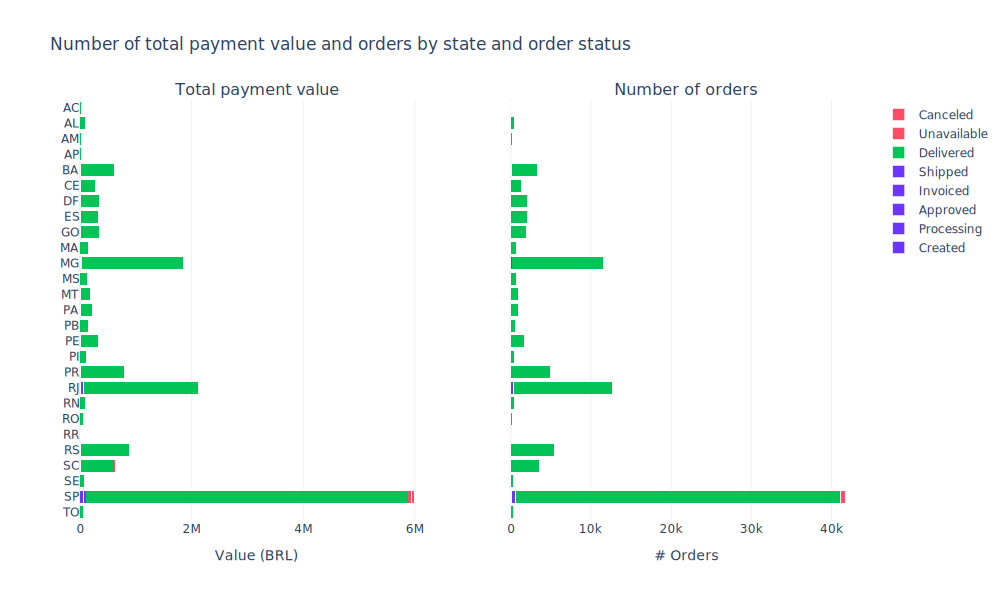

In [46]:
# Creates a plotly figure with the number of orders and the total payment value by state and order status
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Total payment value", "Number of orders"),
    shared_yaxes=True,
    specs=[[{"type": "bar"}, {"type": "bar"}]],
)

map_status_color = parameters["colors"]["by_order_status"]

for status in map_status_color.keys():
    trace1 = go.Bar(
        y=pivot_value_by_state_status["customer_state"],
        x=pivot_value_by_state_status[status],
        orientation="h",
        name=status.title(),
        marker=dict(color=map_status_color[status]),
    )

    trace2 = go.Bar(
        y=pivot_orders_by_state_status["customer_state"],
        x=pivot_orders_by_state_status[status],
        orientation="h",
        name=status.title(),
        showlegend=False,
        marker=dict(color=map_status_color[status]),
    )

    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=1, col=2)

fig.update_layout(
    title_text="Number of total payment value and orders by state and order status",
    height=600,
    width=1000,
)

fig.update_layout(
    barmode="stack",
    xaxis=dict(title="Value (BRL)"),
    xaxis2=dict(title="# Orders"),
)

fig.show(parameters["plotly"]["render"])

In [47]:
# Create a DataFrame with the list of states and their respective regions
state_regions = pd.DataFrame(
    {
        "state": parameters["state_regions"].keys(),
        "region": parameters["state_regions"].values(),
    }
)

state_regions.head()

,state,region
0,AC,North
1,AL,North East
2,AP,North
3,AM,North
4,BA,North East


In [48]:
# Verify the payment share of Southeast states
invoiced_orders_payments = (
    orders.merge(customers, how="left", on="customer_id")
    .merge(order_payments, how="left", on="order_id")
    .loc[:, ["customer_state", "order_status", "payment_value"]]
    .query("order_status.isin(['invoiced', 'shipped', 'delivered'])")
    .groupby(by=["customer_state"])
    .agg({"payment_value": "sum"})
    .reset_index()
    .sort_values(by="payment_value", ascending=False)
)

invoiced_orders_payments["payment_share"] = (
    invoiced_orders_payments["payment_value"]
    / invoiced_orders_payments["payment_value"].sum()
)

southeast_states = state_regions.query("region == 'Southeast'")["state"].tolist()
southeast_payment_share = invoiced_orders_payments.query(
    "customer_state in @southeast_states"
)["payment_share"].sum()

print(f"Payment share of Southeast states: {southeast_payment_share:.1%}")

Payment share of Southeast states: 64.6%


Here we can see that the Southeast states are responsible for almost 2/3 of the total payment value of the invoiced, shipped and delivered orders.

But these sellers are close to their customers? Let's see the relationship between the number of sellers and the number of customers by state.

## Average Ticket by State

In [49]:
# Verify average ticket of delivered orders by state
delivered_orders_by_state = (
    orders.merge(customers, how="left", on="customer_id")
    .merge(order_payments, how="left", on="order_id")
    .query("order_status == 'delivered'")
    .merge(
        state_regions.rename(
            columns={"state": "customer_state", "region": "customer_region"}
        ),
        how="left",
        on="customer_state",
    )
    .loc[
        :,
        [
            "customer_region",
            "customer_state",
            "order_id",
            "payment_value",
        ],
    ]
    .groupby(by=["customer_region", "customer_state", "order_id"])
    .agg({"payment_value": "sum"})
    .reset_index()
)

delivered_orders_by_state.head()

,customer_region,customer_state,order_id,payment_value
0,Midwest,DF,002611a77fe03d076285fd4ca95db77c,156.75
1,Midwest,DF,003a7f59d7e08a9c61d9e2881fe6459c,134.28
2,Midwest,DF,00471463a6106056c1a2a809f70de640,265.96
3,Midwest,DF,006cb7cafc99b29548d4f412c7f9f493,70.14
4,Midwest,DF,00891ba5de66f55000ee358ceea9b345,149.69


In [50]:
# Keeping only up to 95 percentile of payment_value of delivery_orders_by_state due to outliers
quantile_limits = (
    delivered_orders_by_state.groupby(by=["customer_region", "customer_state"])[
        "payment_value"
    ]
    .quantile([0.00, 0.95])
    .reset_index()
    .pivot_table(
        index=["customer_region", "customer_state"],
        columns="level_2",
        values="payment_value",
    )
    .rename(columns={0.00: "min", 0.95: "max"})
    .reset_index()
)

order_by_states_quantile_query = """
SELECT
    o.*
FROM
    delivered_orders_by_state AS o
WHERE
    EXISTS(
        SELECT
            1
        FROM
            quantile_limits AS q
        WHERE
            o.customer_region = q.customer_region
            AND
            o.customer_state = q.customer_state
            AND
            o.payment_value BETWEEN q.min AND q.max
    )
     
    
"""

delivered_orders_by_state_filtered = db.query(order_by_states_quantile_query).to_df()

delivered_orders_by_state_filtered.head()

,customer_region,customer_state,order_id,payment_value
0,Midwest,DF,02d273267575a29864f552b2de598580,221.16
1,Midwest,DF,05906ff9618d78153208c80165d91b2c,133.21
2,Midwest,DF,06eb87385425e5797a1a5c2cdb1b6559,226.14
3,Midwest,DF,06fef7fd666bfeff415e544f1648a7de,44.09
4,Midwest,DF,08e744bae85a55aa0143f7b41878a45d,116.06


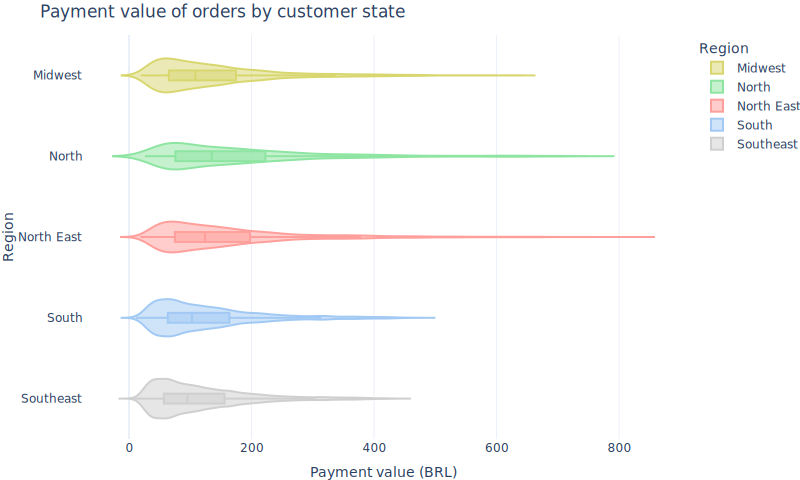

In [51]:
# Creates a violin plotly
fig = px.violin(
    delivered_orders_by_state_filtered,
    x="payment_value",
    y="customer_region",
    color="customer_region",
    color_discrete_map=parameters["colors"]["by_state_region"],
    box=True,
    points=False,
    labels={"payment_value": "Payment value (BRL)", "customer_region": "Region"},
)

fig.update_layout(
    title={
        "text": "Payment value of orders by customer state",
    },
    width=800,
    height=480,
    margin={"r": 0, "t": 35, "l": 0, "b": 0},
)

fig.show(parameters["plotly"]["render"])

Although the **Southeast region** is responsible for almost 2/3 of e-commerce payments, it is the one with the **lowest average ticket** among the five regions

## Regions of origin and destination of orders

### Southeast participation in # orders

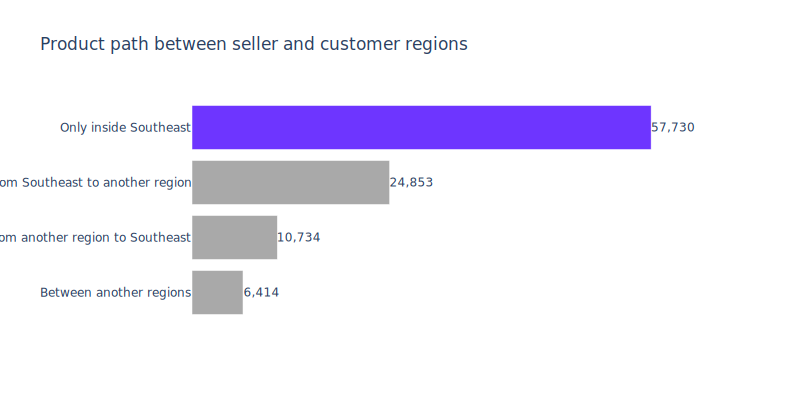

In [52]:
# Calculates the number of orders by seller and customer states
order_by_seller_customer_states = (
    orders.merge(customers, how="left", on="customer_id")
    .merge(order_items, how="left", on="order_id")
    .merge(products, how="left", on="product_id")
    .merge(sellers, how="left", on="seller_id")
    .loc[:, ["customer_state", "seller_state", "order_id"]]
)

order_by_seller_customer_states["is_customer_from_southeast"] = (
    order_by_seller_customer_states["customer_state"].isin(southeast_states)
)
order_by_seller_customer_states["is_seller_from_southeast"] = (
    order_by_seller_customer_states["seller_state"].isin(southeast_states)
)

order_by_seller_customer_states["customer_seller_situation"] = np.select(
    [
        order_by_seller_customer_states["is_customer_from_southeast"]
        & order_by_seller_customer_states["is_seller_from_southeast"],
        ~order_by_seller_customer_states["is_customer_from_southeast"]
        & order_by_seller_customer_states["is_seller_from_southeast"],
        order_by_seller_customer_states["is_customer_from_southeast"]
        & ~order_by_seller_customer_states["is_seller_from_southeast"],
        ~order_by_seller_customer_states["is_customer_from_southeast"]
        & ~order_by_seller_customer_states["is_seller_from_southeast"],
    ],
    [
        "Only inside Southeast",
        "From Southeast to another region",
        "From another region to Southeast",
        "Between another regions",
    ],
    default="Between another regions",
)

order_by_seller_customer_states = (
    order_by_seller_customer_states.groupby(by=["customer_seller_situation"])
    .agg({"order_id": "nunique"})
    .reset_index()
    .rename(columns={"order_id": "n_orders"})
    .sort_values(by="n_orders", ascending=True)
)


fig = go.Figure(
    data=[
        go.Bar(
            x=order_by_seller_customer_states["n_orders"],
            y=order_by_seller_customer_states["customer_seller_situation"],
            marker_color=["#a9a9a9", "#a9a9a9", "#a9a9a9", "#6e35ff"],
            orientation="h",
            text=order_by_seller_customer_states["n_orders"],
            texttemplate="%{text:,}",
            textposition="outside",
        )
    ]
)

# Remove the xaxis values
fig.update_xaxes(showticklabels=False)

# Add the title
fig.update_layout(
    title_text="Product path between seller and customer regions",
    height=400,
    width=800,
)

# Update axes limits to not cut off the first bar
fig.update_xaxes(range=[0, 1.15 * order_by_seller_customer_states["n_orders"].max()])

# Removes the grid
fig.update_xaxes(showgrid=False, zeroline=False)

fig.show(parameters["plotly"]["render"])

### Sankey plot of orders

In [53]:
# Calculates the number of order by seller and customer states
order_by_seller_customer_states = (
    orders.merge(customers, how="left", on="customer_id")
    .merge(order_items, how="left", on="order_id")
    .merge(products, how="left", on="product_id")
    .merge(sellers, how="left", on="seller_id")
    .loc[:, ["customer_state", "seller_state", "order_id"]]
    .replace(
        {
            "customer_state": parameters["state_regions"],
            "seller_state": parameters["state_regions"],
        }
    )
    .rename(
        columns={"customer_state": "customer_region", "seller_state": "seller_region"}
    )
    .groupby(by=["customer_region", "seller_region"])
    .agg({"order_id": "nunique"})
    .reset_index()
    .rename(columns={"order_id": "n_orders"})
    .sort_values(by="n_orders", ascending=False)
)

order_by_seller_customer_states.head()

,customer_region,seller_region,n_orders
22,Southeast,Southeast,57730
17,South,Southeast,10689
21,Southeast,South,8437
12,North East,Southeast,7856
3,Midwest,Southeast,4763


In [54]:
for i, region in enumerate(set(parameters["state_regions"].values())):
    order_by_seller_customer_states.loc[
        order_by_seller_customer_states["customer_region"] == region,
        "customer_region_id",
    ] = i
    order_by_seller_customer_states.loc[
        order_by_seller_customer_states["seller_region"] == region, "seller_region_id"
    ] = i

order_by_seller_customer_states.head()

,customer_region,seller_region,n_orders,customer_region_id,seller_region_id
22,Southeast,Southeast,57730,2.0,2.0
17,South,Southeast,10689,4.0,2.0
21,Southeast,South,8437,2.0,4.0
12,North East,Southeast,7856,3.0,2.0
3,Midwest,Southeast,4763,1.0,2.0


In [55]:
region_name_id = (
    order_by_seller_customer_states[["customer_region", "customer_region_id"]]
    .drop_duplicates()
    .sort_values(by="customer_region_id")
    .rename(columns={"customer_region": "region", "customer_region_id": "region_id"})
)

region_name_id

,region,region_id
7,North,0.0
3,Midwest,1.0
22,Southeast,2.0
12,North East,3.0
17,South,4.0


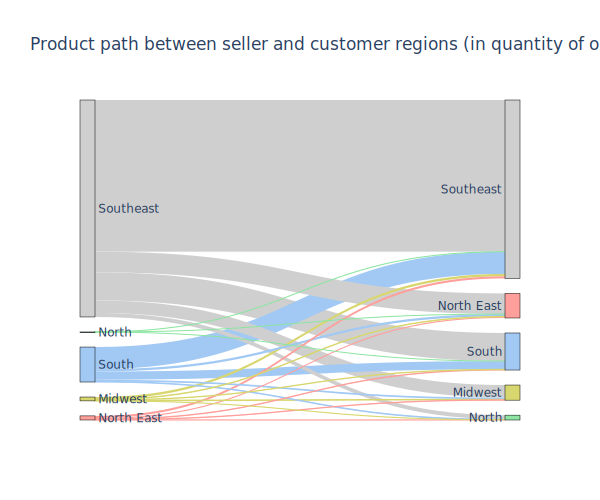

In [56]:
fig = go.Figure(
    data=[
        go.Sankey(
            valueformat=",.0f",
            # Define nodes
            node=dict(
                pad=15,
                thickness=15,
                line=dict(color="black", width=0.5),
                label=pd.concat([region_name_id["region"], region_name_id["region"]]),
                color=pd.concat(
                    [region_name_id["region"], region_name_id["region"]]
                ).apply(lambda x: parameters["colors"]["by_state_region"][x]),
            ),
            # Add links
            link=dict(
                source=order_by_seller_customer_states["seller_region_id"],
                target=order_by_seller_customer_states["customer_region_id"] + 5,
                value=order_by_seller_customer_states["n_orders"],
                label=order_by_seller_customer_states["n_orders"],
                color=order_by_seller_customer_states["seller_region_id"].apply(
                    lambda x: parameters["colors"]["by_state_region"][
                        region_name_id.loc[
                            region_name_id["region_id"] == x, "region"
                        ].values[0]
                    ]
                ),
            ),
        )
    ]
)


fig.update_layout(
    title_text="Product path between seller and customer regions (in quantity of orders)",
    width=600,
    height=500,
)


fig.show(parameters["plotly"]["render"])

The previous chart shows that the **Southeast** states have the **highest participation** both in the number of sellers and in the number of customers.

Let's see the number of customers and sellers plotted on a map.

### Customers and sellers density map

In [57]:
# Creates a standardized dataframe with the geolocation data (1 zip code to 1 state/city, choosing the first one)
city_state_by_zipcode = (
    geolocation.groupby(by=["geolocation_zip_code_prefix"])
    .agg({"geolocation_state": "first", "geolocation_city": "first"})
    .reset_index()
)

city_state_by_zipcode

,geolocation_zip_code_prefix,geolocation_state,geolocation_city
0,1001,SP,sao paulo
1,1002,SP,sao paulo
2,1003,SP,sao paulo
3,1004,SP,sao paulo
4,1005,SP,sao paulo
...,...,...,...
19010,99960,RS,charrua
19011,99965,RS,agua santa
19012,99970,RS,ciriaco
19013,99980,RS,david canabarro


In [58]:
# Calculates the centroid geolocation latitude and longitude by zipcode
centroid_geolocation = (
    geolocation[["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]]
    .merge(
        city_state_by_zipcode,
        how="left",
        on="geolocation_zip_code_prefix",
    )
    .groupby(by=["geolocation_state", "geolocation_city"])
    .agg({"geolocation_lat": "mean", "geolocation_lng": "mean"})
    .reset_index()
    .rename(
        columns={
            "geolocation_lat": "centroid_lat",
            "geolocation_lng": "centroid_lng",
        }
    )
)

centroid_geolocation.head(10)

,geolocation_state,geolocation_city,centroid_lat,centroid_lng
0,AC,acrelandia,-10.059374,-67.037486
1,AC,assis brasil,-10.935106,-69.557831
2,AC,brasileia,-11.005941,-68.749175
3,AC,bujari,-9.798651,-68.004247
4,AC,campinas,-22.861615,-47.064303
5,AC,capixaba,-10.571230,-67.674421
6,AC,cruzeiro do sul,-7.626200,-72.668881
7,AC,epitaciolândia,-11.020953,-68.729392
8,AC,feijo,-8.169583,-70.357297
9,AC,jordão,-9.191311,-71.950423


In [59]:
customers_location = (
    customers[["customer_unique_id", "customer_zip_code_prefix"]]
    .drop_duplicates(subset=["customer_unique_id"])
    .merge(
        city_state_by_zipcode,
        how="left",
        left_on=["customer_zip_code_prefix"],
        right_on=["geolocation_zip_code_prefix"],
    )
    .merge(
        centroid_geolocation,
        how="left",
        on=["geolocation_state", "geolocation_city"],
    )
    .groupby(
        by=["geolocation_state", "geolocation_city", "centroid_lat", "centroid_lng"]
    )
    .agg({"customer_unique_id": "count"})
    .reset_index()
    .rename(columns={"customer_unique_id": "n_customers"})
)

customers_location.head(5).T

,0,1,2,3,4
geolocation_state,AC,AC,AC,AC,AC
geolocation_city,brasileia,cruzeiro do sul,epitaciolândia,manoel urbano,porto acre
centroid_lat,-11.005941,-7.6262,-11.020953,-8.838578,-9.59514
centroid_lng,-68.749175,-72.668881,-68.729392,-69.261385,-67.542961
n_customers,1,3,1,1,1


In [60]:
sellers_location = (
    sellers[["seller_id", "seller_zip_code_prefix"]]
    .drop_duplicates(subset=["seller_id"])
    .merge(
        city_state_by_zipcode,
        how="left",
        left_on=["seller_zip_code_prefix"],
        right_on=["geolocation_zip_code_prefix"],
    )
    .merge(
        centroid_geolocation,
        how="left",
        on=["geolocation_state", "geolocation_city"],
    )
    .groupby(
        by=["geolocation_state", "geolocation_city", "centroid_lat", "centroid_lng"]
    )
    .agg({"seller_id": "count"})
    .reset_index()
    .rename(columns={"seller_id": "n_sellers"})
)

sellers_location.head(5).T

,0,1,2,3,4
geolocation_state,AC,AM,BA,BA,BA
geolocation_city,rio branco,manaus,arraial d'ajuda,barro alto,eunapolis
centroid_lat,-9.966214,-3.079578,-16.400187,-11.769488,-16.369117
centroid_lng,-67.826626,-60.007107,-39.262747,-41.901853,-39.583835
n_sellers,1,1,1,1,1


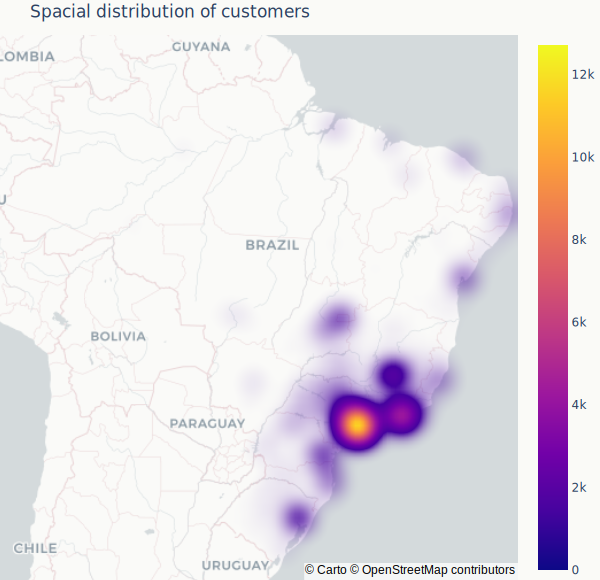

In [91]:
# Spacial distribution of customers
fig = go.Figure(
    go.Densitymapbox(
        lat=customers_location["centroid_lat"],
        lon=customers_location["centroid_lng"],
        z=customers_location["n_customers"],
        radius=35,
        showscale=True,
        hovertemplate="City: %{customdata[0]} <br>State: %{customdata[1]} <br>Number of Customers: %{z:,}",
        customdata=customers_location[["geolocation_city", "geolocation_state"]],
        colorbar=dict(outlinecolor="rgba(0,0,0,0)"),
    )
)

fig.update_layout(
    title={"text": "Spacial distribution of customers"},
    plot_bgcolor="#fafaf7",
    paper_bgcolor="#fafaf7",
    width=600,
    height=580,
    mapbox_style="carto-positron",
    mapbox_center=dict(lat=-15, lon=-54.2),
    mapbox_zoom=3.2,
    margin={"r": 0, "t": 35, "l": 0, "b": 0},
)


fig.show(parameters["plotly"]["render"])

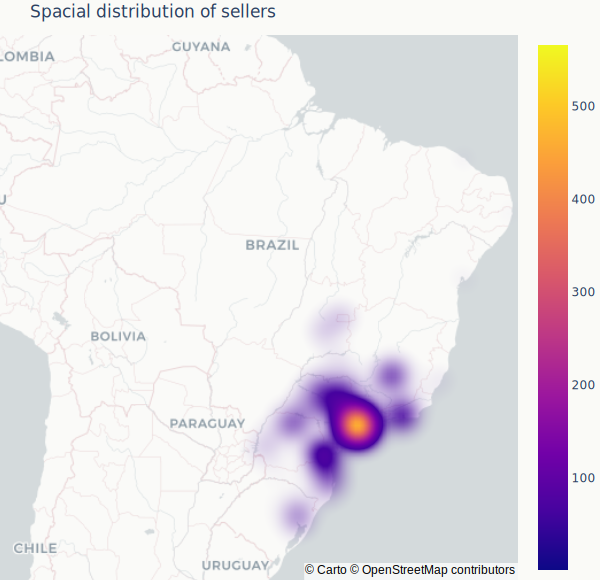

In [92]:
# Spacial distribution of sellers
fig = go.Figure(
    go.Densitymapbox(
        lat=sellers_location["centroid_lat"],
        lon=sellers_location["centroid_lng"],
        z=sellers_location["n_sellers"],
        radius=35,
        showscale=True,
        hovertemplate="City: %{customdata[0]} <br>State: %{customdata[1]} <br>Number of Sellers: %{z:,}",
        customdata=sellers_location[["geolocation_city", "geolocation_state"]],
        colorbar=dict(outlinecolor="rgba(0,0,0,0)"),
    )
)

fig.update_layout(
    title={
        "text": "Spacial distribution of sellers",
    },
    plot_bgcolor="#fafaf7",
    paper_bgcolor="#fafaf7",
    width=600,
    height=580,
    mapbox_style="carto-positron",
    mapbox_center=dict(lat=-15, lon=-54.2),
    mapbox_zoom=3.2,
    margin={"r": 0, "t": 35, "l": 0, "b": 0},
)


fig.show(parameters["plotly"]["render"])

Here we see that despite having significant concentrations of customers in the states of RJ and MG, we do not have a proportional number of sellers in these same two states.

SP is the state with the highest number of sellers and customers in Brazil.

## Number of orders by category over time

In [63]:
# Creates a dataframe with the number of orders by purchase date (YYYY-MM) and product category
orders_by_date_category = (
    orders.merge(order_items, how="left", on="order_id")
    .merge(products, how="left", on="product_id")
    .merge(product_category_name_translation, how="left", on="product_category_name")
    .loc[:, ["order_purchase_timestamp", "product_category_name_english", "order_id"]]
)

orders_by_date_category["purchase_date"] = pd.to_datetime(
    orders_by_date_category["order_purchase_timestamp"]
).dt.strftime("%Y-%m")

orders_by_date_category = (
    orders_by_date_category.groupby(
        by=["purchase_date", "product_category_name_english"]
    )
    .agg({"order_id": "count"})
    .reset_index()
    .rename(columns={"order_id": "n_orders"})
)

orders_by_date_category.head(2)

,purchase_date,product_category_name_english,n_orders
0,2016-09,furniture_decor,2
1,2016-09,health_beauty,3


In [64]:
orders_by_category = (
    orders_by_date_category.groupby(by=["product_category_name_english"])
    .agg({"n_orders": "sum"})
    .reset_index()
    .sort_values(by="n_orders", ascending=False)
)

print(f"Total number of categories: {orders_by_category.shape[0]}\n")

median_orders_by_category = orders_by_category["n_orders"].median()
print(f"Median of orders by category: {median_orders_by_category:,.0f}")
print(
    f"Categories with more orders than median: {orders_by_category.query('n_orders > @median_orders_by_category').shape[0]}\n"
)

mean_orders_by_category = orders_by_category["n_orders"].mean()
print(f"Mean of orders by category: {mean_orders_by_category:,.0f}")
print(
    f"Categories with more orders than mean: {orders_by_category.query('n_orders > @mean_orders_by_category').shape[0]}\n"
)

# Get the categories with more orders than 90 quantile
orders_over_min_quantile = orders_by_category.n_orders.quantile(0.90)
print(f"Number of orders for 90% quantile: {orders_over_min_quantile:,.0f}")
print(
    f"Categories with more orders than 90 quantile: {orders_by_category.query('n_orders > @orders_over_min_quantile').shape[0]}"
)

Total number of categories: 71

Median of orders by category: 281
Categories with more orders than median: 35

Mean of orders by category: 1,564
Categories with more orders than mean: 19

Number of orders for 90% quantile: 4,545
Categories with more orders than 90 quantile: 7


In [65]:
categories_above_min = (
    orders_by_category.query("n_orders > @orders_over_min_quantile")[
        "product_category_name_english"
    ]
    .drop_duplicates()
    .sort_values(ascending=True)
    .reset_index(drop=True)
)

categories_above_min.head()

0           bed_bath_table
1    computers_accessories
2          furniture_decor
3            health_beauty
4               housewares
Name: product_category_name_english, dtype: object

In [66]:
# The categories with more orders than the median were manually reclassified into new groups
new_categories = {
    "bed_bath_table": "home",
    "computers_accessories": "technology",
    "furniture_decor": "home",
    "health_beauty": "beauty",
    "housewares": "home",
    "sports_leisure": "leisure",
    "watches_gifts": "accessories",
}

In [67]:
# Recalculates the sum of orders by category using the new categories
orders_by_new_categories = (
    orders_by_date_category.merge(
        pd.DataFrame(
            new_categories.items(),
            columns=["product_category_name_english", "new_category"],
        ),
        how="left",
        on="product_category_name_english",
    )
    .fillna({"new_category": "others"})
    .groupby(by=["purchase_date", "new_category"])
    .agg({"n_orders": "sum"})
    .reset_index()
    .rename(columns={"n_orders": "n_orders_by_category"})
    .sort_values(by=["new_category", "purchase_date"], ascending=True)
)

orders_by_new_categories.head(2)

,purchase_date,new_category,n_orders_by_category
3,2016-10,accessories,5
10,2017-01,accessories,11


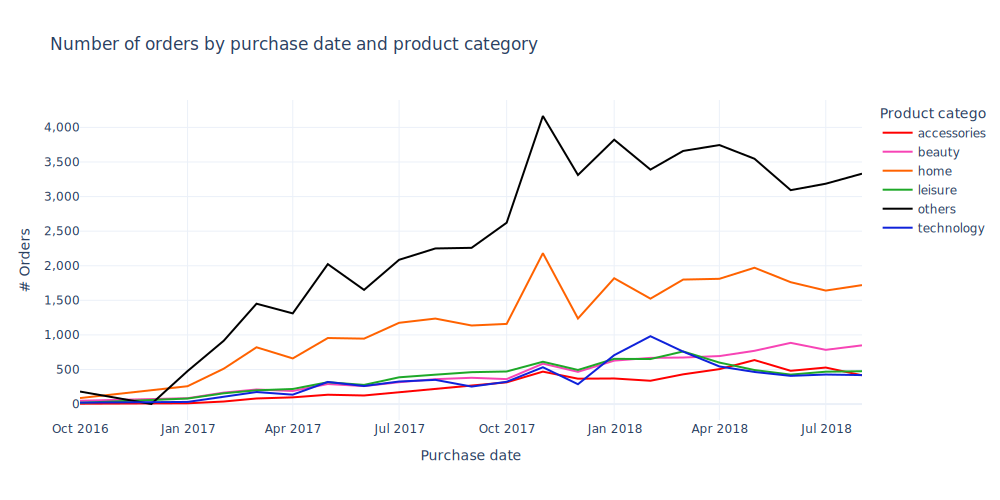

In [68]:
# Creates a line chart with the number of orders by purchase date (YYYY-MM) and product category
fig = px.line(
    orders_by_new_categories[
        orders_by_new_categories["purchase_date"].between("2016-10", "2018-08")
    ],
    x="purchase_date",
    y="n_orders_by_category",
    color="new_category",
    color_discrete_map=parameters["colors"]["by_product_category"],
    title="Number of orders by purchase date and product category",
    height=500,
    width=1000,
    labels={
        "purchase_date": "Purchase date",
        "n_orders_by_category": "# Orders",
        "new_category": "Product category",
    },
)

# Format number of orders to show thousands separator
fig.update_layout(yaxis=dict(tickformat=",.0f"))

# Uses "500" as yaxis minor tick range
fig.update_yaxes(dtick=500)

fig.show(parameters["plotly"]["render"])

## Customer's metrics

New dataset with all necessary joins

In [69]:
query_customer_infos = """
SELECT
    c.customer_unique_id,
    c.customer_id,
    o.order_id,
    o.order_status,
    o.order_purchase_timestamp,
    CAST(CAST(o.order_purchase_timestamp AS DATE) AS STRING) AS order_purchase_date,
    p.product_id,
    pcnt.product_category_name_english,
    oi.price AS product_price,
    op.payment_sequential,
    op.payment_type,
    op.payment_installments,
    op.payment_value
FROM
    customers AS c
LEFT JOIN
    orders AS o ON c.customer_id = o.customer_id
LEFT JOIN
    order_items AS oi ON o.order_id = oi.order_id
LEFT JOIN
    products AS p ON oi.product_id = p.product_id
LEFT JOIN
    product_category_name_translation AS pcnt ON p.product_category_name = pcnt.product_category_name
LEFT JOIN
    order_payments AS op ON o.order_id = op.order_id
WHERE
    CAST(o.order_purchase_timestamp AS DATE) <= CAST('2018-08-31' AS DATE)
    OR
    o.order_purchase_timestamp IS NULL
"""

customer_infos = db.query(query_customer_infos).to_df()
customer_infos.head()

,customer_unique_id,customer_id,order_id,order_status,order_purchase_timestamp,order_purchase_date,product_id,product_category_name_english,product_price,payment_sequential,payment_type,payment_installments,payment_value
0,3562599b97f4ddc436ecccddfdd95d54,9b5d68f669f7ed215f789471556529fe,e8805f1923e711c407c454831b49643f,delivered,2017-04-05 11:04:33,2017-04-05,80103e141ed0da3b1d63cb0c7d1f7d48,telephony,99.90,1.0,boleto,1.0,114.77
1,7f61eced85edf4c04ed04e441ba02cae,5ca0847591cdad1a279fd89aa4e58e04,e880a2a0f19dcb0f2ef51fed71ef34c9,delivered,2018-03-29 01:10:03,2018-03-29,37116a322ceabbe82c30430000af0db3,bed_bath_table,17.99,1.0,credit_card,7.0,74.62
2,7f61eced85edf4c04ed04e441ba02cae,5ca0847591cdad1a279fd89aa4e58e04,e880a2a0f19dcb0f2ef51fed71ef34c9,delivered,2018-03-29 01:10:03,2018-03-29,37116a322ceabbe82c30430000af0db3,bed_bath_table,17.99,1.0,credit_card,7.0,74.62
3,49be61a35d19a1411e1ab4d556a90a85,804c3fcfa00f15adc54c342c2971b2cc,e88333581538e25e87d48b2dbc1782b8,delivered,2018-03-13 13:23:37,2018-03-13,53b36df67ebb7c41585e8d54d6772e08,watches_gifts,120.00,1.0,credit_card,3.0,137.75
4,bf448042b40749d8b95fe00c08a9b5cb,a930e8971b7eed8b6fd594e8bc933058,e883aa370777928f8939c79a58ef69b4,delivered,2018-02-01 07:49:37,2018-02-01,45b280868bcc8124d9309f459a42eeaf,sports_leisure,169.00,1.0,credit_card,4.0,184.93


### Recency

Recency = days since last customer order until '2018-08-31' (last month with a normal number of orders)

In [70]:
recency = (
    customer_infos
    .loc[
        ~customer_infos.order_purchase_date.isna(),
        ["customer_unique_id", "order_purchase_date"],
    ]
    .sort_values(
        by=["order_purchase_date", "customer_unique_id"],
        ascending=[False, True]
    )
    .drop_duplicates(subset="customer_unique_id")
)

recency["recency_in_days"] = recency.order_purchase_date.apply(lambda x: pdm.parse(x).diff(pdm.parse("2018-08-31")).in_days())

recency

,customer_unique_id,order_purchase_date,recency_in_days
118336,e90598185d2427a35e32ef241a5c04aa,2018-08-31,0
118233,230a1e9f42924d41f37fd22a1d4a9707,2018-08-30,1
118260,3158fc4f60ca92412de397461b64cee3,2018-08-30,1
117923,91544d22848a922381b73b5e21ad58ff,2018-08-30,1
117755,eb240714223915add224beff2d844e53,2018-08-30,1
...,...,...,...
57608,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02,698
116430,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15,715
118332,009b0127b727ab0ba422f6d9604487c7,2016-09-13,717
114095,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05,725


In [71]:
# First available order in orders dataset
orders.order_purchase_timestamp.min()

'2016-09-04 21:15:19'

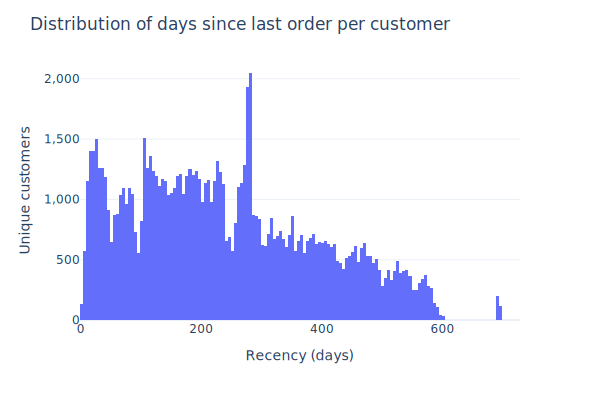

In [72]:
fig = px.histogram(
    recency,
    x="recency_in_days",
    width=600,
    height=400
)

fig.update_layout(
    title="Distribution of days since last order per customer",
    xaxis_title='Recency (days)',
    yaxis_title='Unique customers',
    yaxis=dict(tickformat=",.0f")
)

fig.show(parameters["plotly"]["render"])

Here we see that more than half of unique customers in the dataset has churned, considering churned a client that doesn't buyed anything in the last 180 days

### Churn rate

In [73]:
# Calculates the proportion of active customers considering a limit of 180 days since their last order
churn = (
    recency
    .assign(churn=lambda x: x.recency_in_days > 180)
    .loc[:, ["customer_unique_id", "churn"]]
)

churn.churn.value_counts(True)

churn
True     0.598918
False    0.401082
Name: proportion, dtype: float64

Almost 60% of the customer base can be considered inactive, as their last order was more than 180 days ago.

### Frequency

In [74]:
# Calculates the number of orders per customer during the entire period analyzed
frequency = (
    customer_infos
    .loc[:, ["customer_unique_id", "order_id"]]
    .drop_duplicates()
    .groupby("customer_unique_id")
    .agg("count")
    .reset_index()
    .rename(columns={"order_id": "quantity_of_orders"})
    .sort_values("quantity_of_orders", ascending=False)
)

frequency

,customer_unique_id,quantity_of_orders
52970,8d50f5eadf50201ccdcedfb9e2ac8455,17
23470,3e43e6105506432c953e165fb2acf44c,9
10352,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37795,6469f99c1f9dfae7733b25662e7f1782,7
76076,ca77025e7201e3b30c44b472ff346268,7
...,...,...
32502,56560124a5cc70119deb685775639ea7,1
32501,5655ee330a79bd1fd1e5fb220c2436dd,1
32500,5655967ad654dc2d2affca3502631db7,1
32499,56556a95d541c4ca3745744d9aeebc00,1


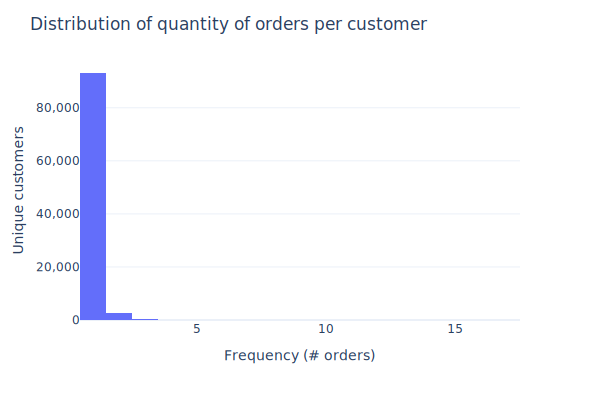

In [75]:
fig = px.histogram(
    frequency,
    x="quantity_of_orders",
    width=600,
    height=400
)

fig.update_layout(
    title="Distribution of quantity of orders per customer",
    xaxis_title='Frequency (# orders)',
    yaxis_title='Unique customers',
    yaxis=dict(tickformat=",.0f")
)

fig.show(parameters["plotly"]["render"])

In [76]:
# Calculates the proportion of each value of `quantity_of_orders`
frequency.quantity_of_orders.value_counts(normalize=True)

quantity_of_orders
1     0.968915
2     0.028505
3     0.002071
4     0.000312
5     0.000083
6     0.000062
7     0.000031
17    0.000010
9     0.000010
Name: proportion, dtype: float64

The histogram shows that the base has customers who mostly (96,9%) made just 1 single purchase on the Olist marketplace.

This probably occurs because **the dataset is a random sample** extracted by the company itself, and not a complete dataset.

### Total revenue

In [77]:
# Calculates the number of orders per customer during the entire period analyzed
total_revenue = (
    customer_infos
    .loc[:, ["customer_unique_id", "order_id", "payment_sequential", "payment_value"]]
    .drop_duplicates()
    .drop(columns=["order_id", "payment_sequential"])
    .groupby("customer_unique_id")
    .agg("sum")
    .reset_index()
    .rename(columns={"payment_value": "revenue"})
    .sort_values("revenue")
)

total_revenue

,customer_unique_id,revenue
49310,830d5b7aaa3b6f1e9ad63703bec97d23,0.00
29975,4fa4365000c7090fcb8cad5713c6d3db,0.00
18641,317cfc692e3f86c45c95697c61c853a6,9.59
71047,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07
67383,b33336f46234b24a613ad9064d13106d,10.89
...,...,...
82802,dc4802a71eae9be1dd28f5d788ceb526,6929.31
44445,763c8b1c9c68a0229c42c9fc6f662b93,7274.88
81956,da122df9eeddfedc1dc1f5349a1a690c,7571.63
26454,46450c74a0d8c5ca9395da1daac6c120,9553.02


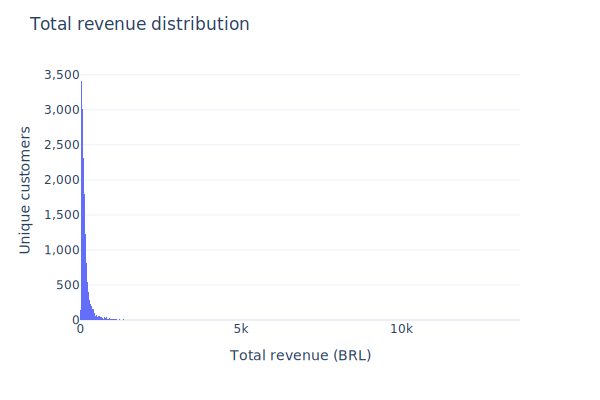

In [78]:
fig = px.histogram(
    total_revenue,
    x="revenue",
    width=600,
    height=400
)

fig.update_layout(
    title="Total revenue distribution",
    xaxis_title='Total revenue (BRL)',
    yaxis_title='Unique customers',
    yaxis=dict(tickformat=",.0f")
)

fig.show(parameters["plotly"]["render"])

Due to a few customers with revenues exceeding 1,000 BRL, the histogram becomes a little difficult to extract data from.

Let's analyze the cumulative revenue distribution using an ECDF Plot.

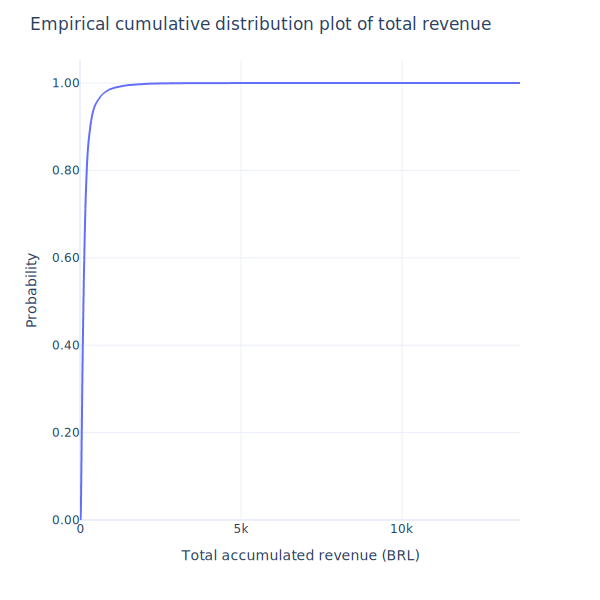

In [93]:
fig = px.ecdf(
    total_revenue,
    x="revenue",
    width=600,
    height=600
)

fig.update_layout(
    title="Empirical cumulative distribution plot of total revenue",
    xaxis_title='Total accumulated revenue (BRL)',
    yaxis_title='Probability',
    yaxis=dict(tickformat=",.2f")
)

fig.show(parameters["plotly"]["render"])

From the ECDF plot we can see that **a cutoff value of 1,000 BRL** in revenue already represents a proportion of **more than 99% of the customers** analyzed.

Let's now plot a new histogram limiting the revenue value of each customer to a maximum of 1,000 BRL.

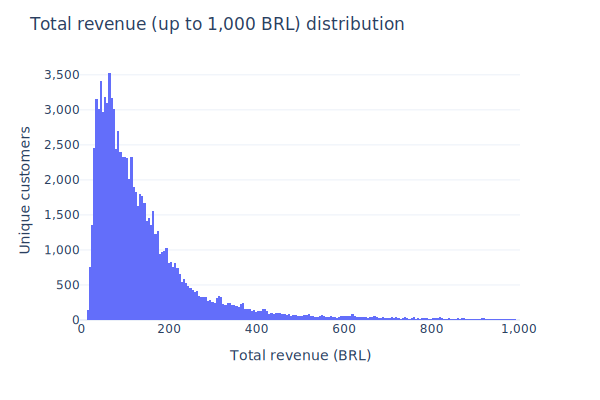

In [80]:
# Histogram of total revenue per customer (limited to a maximum of 1,000 BRL)
fig = px.histogram(
    total_revenue.query("revenue <= 1000"),
    x="revenue",
    width=600,
    height=400
)

fig.update_layout(
    title="Total revenue (up to 1,000 BRL) distribution",
    xaxis_title='Total revenue (BRL)',
    yaxis_title='Unique customers',
    xaxis=dict(tickformat=",.0f"),
    yaxis=dict(tickformat=",.0f")
)

fig.show(parameters["plotly"]["render"])

From the last histogram we can see that **total revenue is concentrated in amounts from 40 to 80 BRL**, which is practically the average value of customer purchases (since we saw that 96.9% of the customer dataset made only a single purchase due to the process random sampling).

## NLP

### Comments sentiment classification

In [81]:
# Creates a new column with the title and the review message
order_reviews["review_text"] = (
    order_reviews["review_comment_title"].fillna("")
    + " "
    + order_reviews["review_comment_message"].fillna("")
)

# Converts to lower case
order_reviews["review_text"] = order_reviews["review_text"].str.lower()

# Removes special characters
order_reviews["review_text"] = order_reviews["review_text"].str.replace(
    r"[^\w\s]", " ", regex=True
)

# Removes numbers
order_reviews["review_text"] = order_reviews["review_text"].str.replace(
    r"\d+", "", regex=True
)

# Removes new lines
order_reviews["review_text"] = order_reviews["review_text"].str.replace(
    r"\n", " ", regex=True
)

# Removes multiple spaces
order_reviews["review_text"] = order_reviews["review_text"].str.replace(
    r"\s+", " ", regex=True
)

# Removes spaces at the beginning and end of the string
order_reviews["review_text"] = order_reviews["review_text"].str.strip()

# Replaces empty strings with NaN
order_reviews["review_text"] = order_reviews["review_text"].replace("", np.nan)

order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_text
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,recebi bem antes do prazo estipulado
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,parabéns lojas lannister adorei comprar pela i...


In [82]:
# Checks the proportion of NaN values in the review_text column
order_reviews["review_text"].isna().value_counts(normalize=True)

review_text
True     0.57214
False    0.42786
Name: proportion, dtype: float64

More than half of the comments are missing, so we'll have to verify later if this problem is caused by the lack of comments or by the lack of reviews.

In [83]:
# If the .parquet file already exists, reads it
# Otherwise, creates a new column with the sentiment and the score (~260 min)
if project_folder.joinpath(
    "data", "processed", "order_reviews_sentiment.parquet"
).exists():
    order_reviews_sentiment = pd.read_parquet(
        project_folder.joinpath("data", "processed", "order_reviews_sentiment.parquet")
    )
else:
    # Copies the order_reviews dataframe
    order_reviews_sentiment = order_reviews.copy()

    # Creates a new column with the sentiment and the score
    order_reviews_sentiment["sentiment"] = order_reviews_sentiment["review_text"].map(
        lambda x: {
            dictionary["label"]: dictionary["score"]
            for dictionary in sentiment_classifier(x, top_k=None)
        },
        na_action="ignore",
    )

    # Separates the sentiment and the score in different columns
    order_reviews_sentiment["positive_score"] = order_reviews_sentiment[
        "sentiment"
    ].map(lambda x: x["POS"] if isinstance(x, dict) else np.nan)
    order_reviews_sentiment["neutral_score"] = order_reviews_sentiment["sentiment"].map(
        lambda x: x["NEU"] if isinstance(x, dict) else np.nan
    )
    order_reviews_sentiment["negative_score"] = order_reviews_sentiment[
        "sentiment"
    ].map(lambda x: x["NEG"] if isinstance(x, dict) else np.nan)

    # Creates a new column with the sentiment label
    sentiment_labels = {"POS": "Positive", "NEU": "Neutral", "NEG": "Negative"}
    order_reviews_sentiment["sentiment_label"] = order_reviews_sentiment[
        "sentiment"
    ].map(
        lambda x: sentiment_labels.get(max(x, key=x.get))
        if isinstance(x, dict)
        else np.nan
    )

    # Saves the dataframe to a .parquet file
    order_reviews_sentiment.to_parquet(
        project_folder.joinpath("data", "processed", "order_reviews_sentiment.parquet"),
        index=False,
    )

order_reviews_sentiment.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_text,sentiment,positive_score,neutral_score,negative_score,sentiment_label
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,None,None,NaN,NaN,NaN,None
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13,None,None,NaN,NaN,NaN,None
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24,None,None,NaN,NaN,NaN,None
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,recebi bem antes do prazo estipulado,"{'NEG': 0.055957626551389694, 'NEU': 0.8218240...",0.122218,0.821824,0.055958,Neutral
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,parabéns lojas lannister adorei comprar pela i...,"{'NEG': 0.0017929633613675833, 'NEU': 0.006466...",0.991741,0.006466,0.001793,Positive


In [84]:
# Positive reviews examples
order_reviews_sentiment[["positive_score", "review_text"]].sort_values(
    by="positive_score", ascending=False
).head(5)

,positive_score,review_text
5235,0.994251,o produto é uma graça além de pratico muito li...
8367,0.994110,otímo adorei a cauterização da trivitt quero p...
65108,0.994079,ótimo muito bom e lindo o produto
70627,0.994033,amei o produto agilidade na entrega chegou mui...
64788,0.994011,muito bom a lojas lannister produtos muito bonito


In [85]:
# Neutral reviews examples
order_reviews_sentiment[["neutral_score", "review_text"]].sort_values(
    by="neutral_score", ascending=False
).head(5)

,neutral_score,review_text
49780,0.975681,somente o toner amarelo chegou até o momento
57174,0.974293,dentro do anunciado
54419,0.969607,estampa diferente do anunciado
89361,0.969598,ainda vou avaliar se realmente é original da p...
94277,0.967110,luminária o produto é um plástico duro vamos v...


In [86]:
# Negative reviews examples
order_reviews_sentiment[["negative_score", "review_text"]].sort_values(
    by="negative_score", ascending=False
).head(5)

,negative_score,review_text
17795,0.993699,relógio horrível péssimo sem qualidade materia...
10432,0.993670,não gostei tecido ruim péssimo
65079,0.993641,a manta é uma porcaria não vale nada é pior qu...
44775,0.993618,não gostei do acabamento produto de péssima qu...
55536,0.993502,produto de péssima qualidade a estampa do skat...


### Sentiment vs. order review score correlation

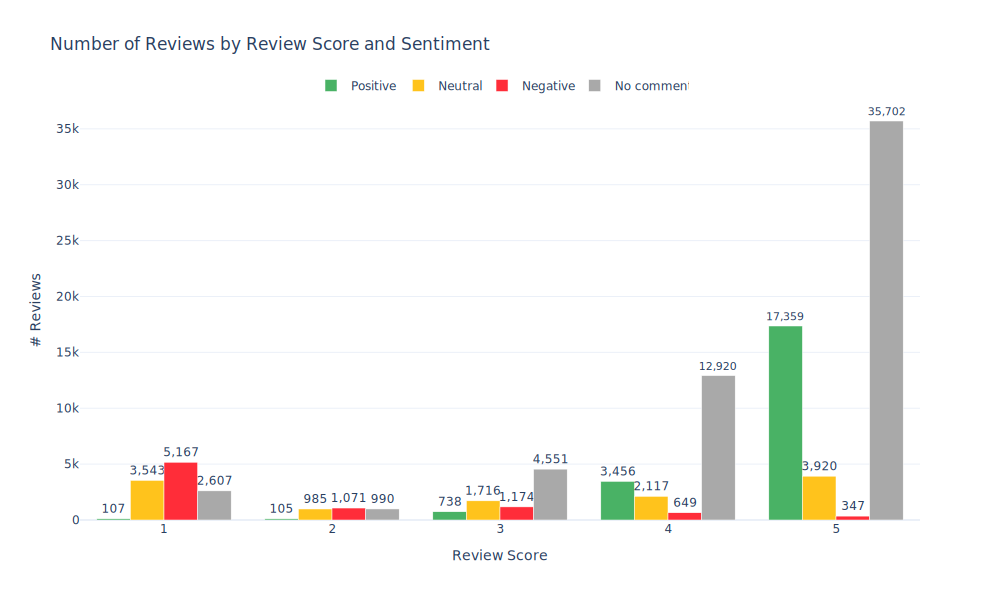

In [87]:
# Creates a aggregated dataframe with the percentage of positive, neutral and negative reviews by review_score
sentiment_by_review_rate = (
    order_reviews_sentiment[["review_score", "sentiment_label", "review_id"]]
    .fillna("No comment")
    .groupby(by=["review_score", "sentiment_label"])
    .agg({"review_id": "count"})
    .reset_index()
    .rename(columns={"review_id": "n_reviews"})
)

fig = go.Figure()

for sentiment in parameters["colors"]["by_comment_sentiment"].keys():
    fig.add_trace(
        go.Bar(
            x=sentiment_by_review_rate[
                sentiment_by_review_rate["sentiment_label"] == sentiment
            ]["review_score"],
            y=sentiment_by_review_rate[
                sentiment_by_review_rate["sentiment_label"] == sentiment
            ]["n_reviews"],
            name=sentiment,
            marker_color=parameters["colors"]["by_comment_sentiment"][sentiment],
            text=sentiment_by_review_rate[
                sentiment_by_review_rate["sentiment_label"] == sentiment
            ]["n_reviews"],
            textposition="outside",
            texttemplate="%{text:,}",
            hovertemplate=[
                "Review Score: %{x}",
                "Sentiment: %{y}",
                "Number of Reviews: %{text:,}",
            ],
        )
    )

fig.update_layout(
    title_text="Number of Reviews by Review Score and Sentiment",
    xaxis=dict(title="Review Score"),
    yaxis=dict(title="# Reviews"),
)

# Sets the step of the yaxis to 5000 orders
fig.update_yaxes(dtick=5000)

# Move legend to the top
fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)

# Adjusts the size of the figure
fig.update_layout(
    width=1000,
    height=600,
)

fig.show(parameters["plotly"]["render"])

Most of the positive comments are distributed in the 4 and 5-star reviews, while the negative comments are concentrated in the 1-star reviews.

Furthermore, 5-star reviews concentrate the highest number of comments in general.

Another insight is that the number of missing comments decreases as the ratings given to orders increase, probably because customers are **more likely to leave a comment when they are unsatisfied** with their purchase.

But what about positive comments in a 1-star reviews and negative comments in a 5-star reviews? Despite being uncommon, they do exist. Let's take a look at some examples:

In [88]:
# 5-star reviews with negative sentiment
order_reviews_sentiment[
    (order_reviews_sentiment["review_score"] == 5)
    & (order_reviews_sentiment["sentiment_label"] == "Negative")
][["review_score", "sentiment_label", "review_text"]].head(10)

,review_score,sentiment_label,review_text
170,5,Negative,prazo entrega espero receber esta semana o que...
204,5,Negative,nada a declarar
430,5,Negative,produto fraco quanto ao site não tenho o que q...
674,5,Negative,sdds
812,5,Negative,n a
1020,5,Negative,péssima recebi o produto que eh falso quero me...
1217,5,Negative,só acho que poderia ter comprado mais cartucho...
1566,5,Negative,balancim ainda não pode avaliar o produto esto...
1742,5,Negative,lojas lannister cumpre prazo mercadoria corret...
1898,5,Negative,tudo correto exceto a demora que não é culpa d...


Here we can see that the customer was satisfied with the product, but the delivery was delayed.

Or in other cases, the customer was satisfied with the purchase process in marketplace, but the received product was not what they expected.

There are some comments classified as negative, but the customer wrote monotone comments, like "ok" or "n a". Here we can fine tune the model to classify these comments as neutral and solve this problem in future updates.

In [89]:
# 5-star reviews with negative sentiment
order_reviews_sentiment[
    (order_reviews_sentiment["review_score"] == 1)
    & (order_reviews_sentiment["sentiment_label"] == "Positive")
][["review_score", "sentiment_label", "review_text"]].sample(10)

,review_score,sentiment_label,review_text
40960,1,Positive,superou as expectativas
38790,1,Positive,adorei chegou super rápido perfeito
63834,1,Positive,a luminária é linda mas comprei e paguei lumin...
19224,1,Positive,infelizmente o produto veio errado pedi chocol...
45917,1,Positive,o baratheon é excelente a entrega é rápida mai...
71120,1,Positive,super recomendo lannister entrega tudo no prazo
85315,1,Positive,recomendo produto otimo o simparic mg não foi ...
50813,1,Positive,gostei só que demorou muito p chegar
74179,1,Positive,é muito fino
37510,1,Positive,comprei um chegou outro porem e bonito igual a...


In this case, we can see a lot of positive comments with the right classification but with an **unconformity in the order review score**, probably because the customer was satisfied with the product, but he doesn't know how to use the product review system.

### Waterfall of review comments during the purchase process

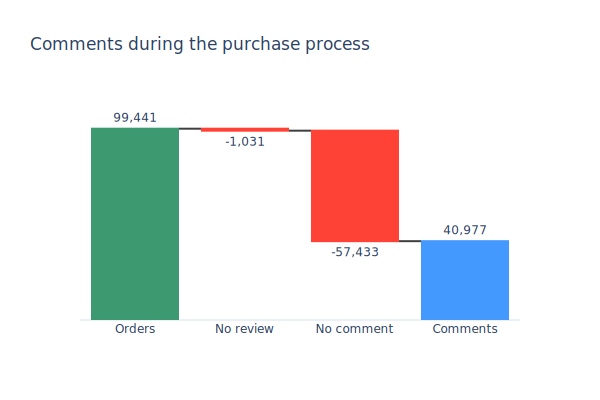

In [90]:
# Calculates the amount of orders, reviews and comments
orders_quantity = orders.order_id.nunique()
reviews_quantity = order_reviews_sentiment.review_id.nunique()
comments_quantity = order_reviews_sentiment.review_comment_message.count()

no_review_quantity = orders_quantity - reviews_quantity
no_comment_quantity = reviews_quantity - comments_quantity

# Creates a waterfall chart with the amount of orders, reviews and comments quantities
fig = go.Figure(
    go.Waterfall(
        name="Reviews comments",
        orientation="v",
        measure=["relative", "relative", "relative", "total"],
        x=["Orders", "No review", "No comment", "Comments"],
        textposition="outside",
        text=[
            f"{orders_quantity:,}",
            f"-{no_review_quantity:,}",
            f"-{no_comment_quantity:,}",
            f"{comments_quantity:,}",
        ],
        y=[
            orders_quantity,
            -no_review_quantity,
            -no_comment_quantity,
            reviews_quantity,
        ],
        connector={"line": {"color": "rgb(63, 63, 63)"}},
    )
)

# Makes some style adjustments
fig.update_layout(
    title="Comments during the purchase process",
    height=400,
    width=600,
    showlegend=False,
    yaxis=dict(showticklabels=False),
)

# Update axes limits to not cut off the first bar
fig.update_yaxes(range=[0, 1.15 * orders_quantity])

# Removes the grid
fig.update_yaxes(showgrid=False)

fig.show(parameters["plotly"]["render"])

So almost of every purchase has a review, but more than half of it has no comment text, just a score from 1 to 5 stars.